# import modules

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# helper functions (if necessary)

In [1]:
# python code...

# read in training data

In [12]:
train_data = pd.read_csv('test.csv')
print(train_data)

    Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr45  \
0      0     0     1     0     0     2     0     0     0      1  ...      0   
1      2     2     3     0     0     1     0     0     0      1  ...      2   
2      3     3     2     3     3     1     1     3     3      3  ...      3   
3      0     0     1     0     0     1     0     0     0      0  ...      0   
4      0     0     0     0     0     0     0     0     0      0  ...      4   
5      3     3     2     3     3     1     1     3     2      3  ...      4   
6      0     0     0     0     0     0     0     0     0      0  ...      4   
7      3     2     2     3     3     2     1     2     2      3  ...      4   
8      0     1     2     0     0     0     0     0     0      1  ...      1   
9      2     2     1     0     0     4     1     3     3      3  ...      2   
10     3     4     2     3     3     0     1     4     2      3  ...      3   
11     0     0     3     0     0     1     0     0  

# analyze and visualize data

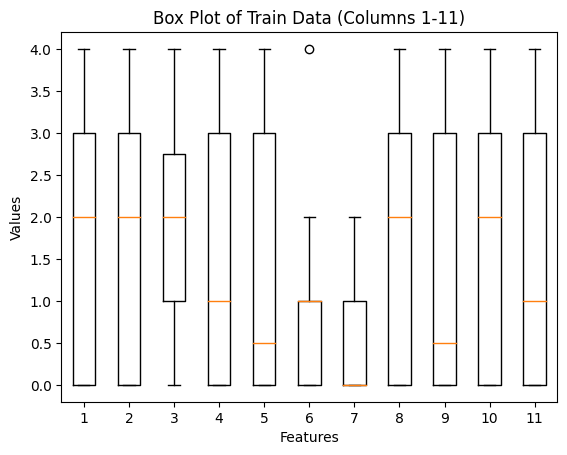

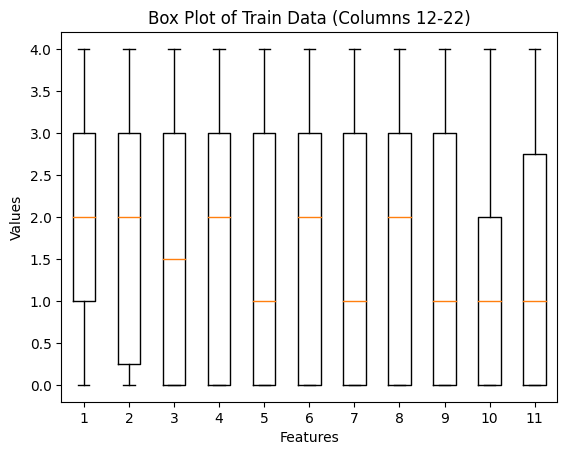

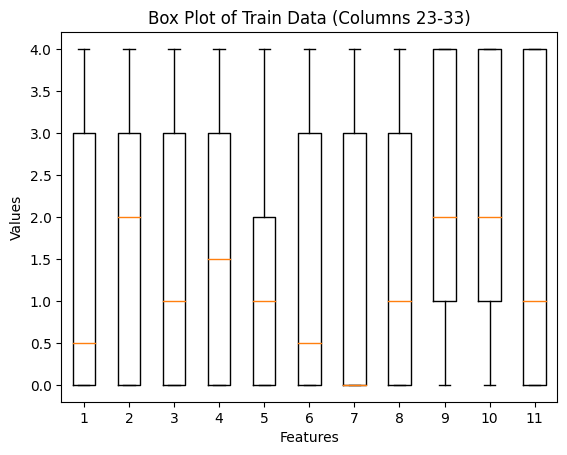

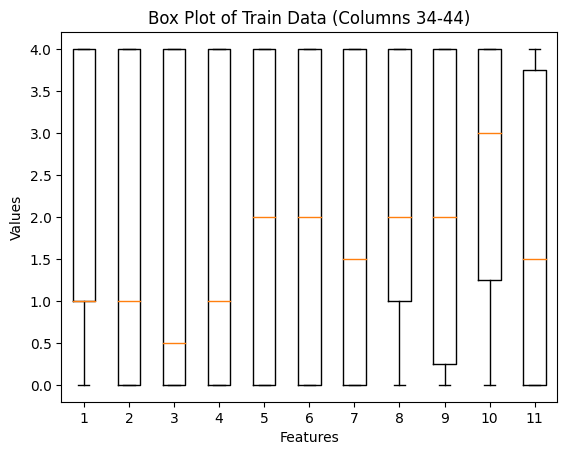

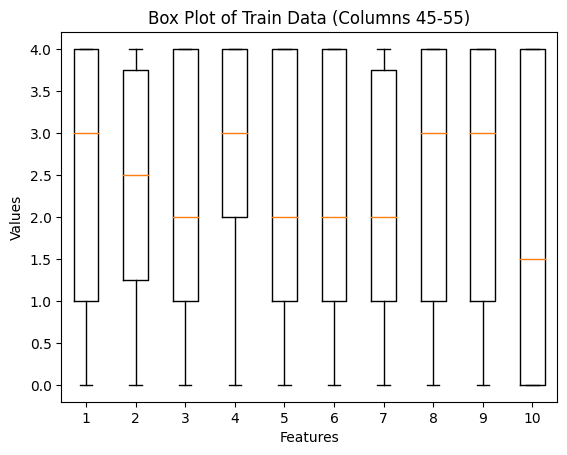

In [28]:
# Split the data into chunks of 10 columns
chunks = [train_data.iloc[:, i:i+11] for i in range(0, len(train_data.columns), 11)]

# Generate a box plot for each chunk using pyplot
for i, chunk in enumerate(chunks):
    plt.figure()
    plt.boxplot(chunk.values)
    plt.xlabel('Features')
    plt.ylabel('Values')
    plt.title(f'Box Plot of Train Data (Columns {i*11+1}-{i*11+11})')

# Display the plots
plt.show()

# experiment with features and models to predict Divorce class

In [32]:
# select the features to use in the model (exclude the last column)
features = list(train_data.columns)[:-1]

# split the training data into X (features) and y (labels)
X_train = train_data[features]
y_train = train_data.iloc[:, -1]

# initialize a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

# Question: What features and model parameters worked "best"?  Why?

answer goes here

# build "fresh" classification model based on experimentation

In [5]:
# python code...

# read in test data

In [6]:
# python code...

# predict Divorce class of test data

In [7]:
# python code...

# write test data with predictions to \<YourLastName.csv>

In [8]:
# python code...